# Logistic Map / Bifurcation diagram

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Equation:  
#### X<sub>n+1</sub> = a * x<sub>n</sub> * (1 - x<sub>n</sub>)

### parameter  'a' and iterations

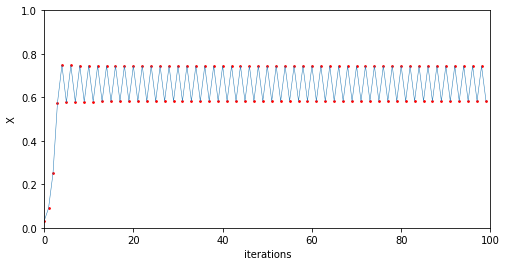

In [141]:
a = 3.06
x = 0.01
X = []
iterations = list(range(100))

for _ in iterations:
    x = a * x * (1 - x)
    X.append(x)
    
plt.figure(figsize=(8, 4))
plt.axis([0, 100, 0, 1])
plt.xlabel('iterations')
plt.ylabel('X')
plt.scatter(iterations, X, c='r', s=3)
plt.plot(iterations, X, lw=0.5)

### interactive slider on parameter 'a' with ipywidgets

In [142]:
from ipywidgets import interact

@interact(a=(0, 4, 0.01))
def logistic(a):
    N = 100
    x = 0.01
    X = []
    iterations = list(range(N))
    for i in iterations:
        x = a * x * (1 - x)
        X.append(x)
    plt.figure(figsize=(8, 4))
    plt.axis([0, N, 0, 1])
    plt.xlabel('iterations')
    plt.ylabel('X')
    plt.scatter(iterations, X, c='r', s=3, label=a)
    plt.plot(iterations, X, lw=0.5)
    
# [3.06(2), 3.53(4), 3.63(6), 3.74(5), 3.84(3)]

interactive(children=(FloatSlider(value=2.0, description='a', max=4.0, step=0.01), Output()), _dom_classes=('w…

### A-X graph : single loop result

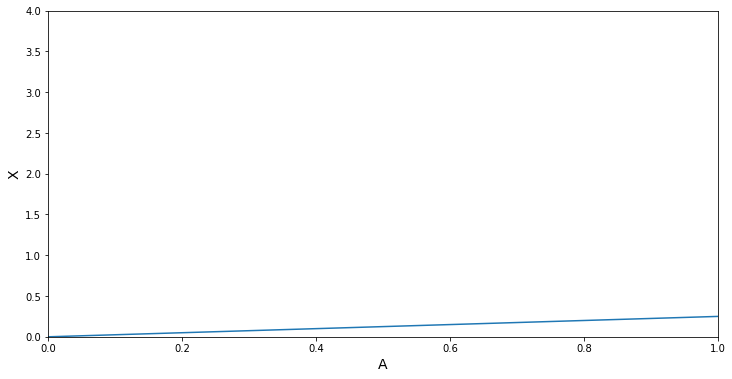

In [146]:
import numpy as np
import matplotlib.pyplot as plt

A_steps = 1000
A = np.arange(0.0, 4.0, 4.0/A_steps)
x = 0.5

x = A * x * (1 - x)

fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111)
ax.axis([0, 1, 0, 4])
ax.set_xlabel('A', fontsize=14)
ax.set_ylabel('X', fontsize=14)
ax.plot(A, x)

### 10 iterations and result

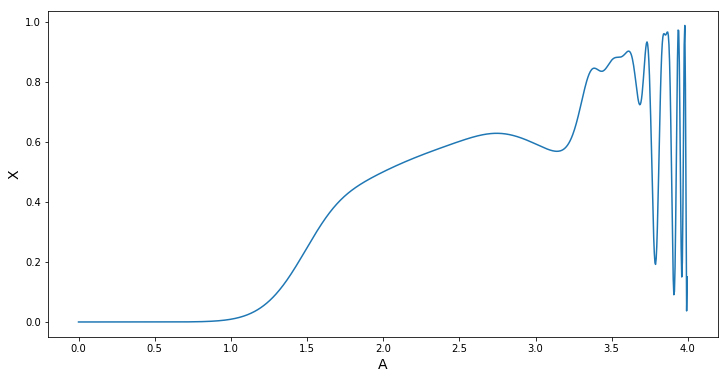

In [148]:
A_steps = 1000
A = np.arange(0.0, 4.0, 4.0/A_steps)
x = 0.01

X_iter = 10
for i in range(X_iter):
    x = A * x * (1 - x)

fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111)
ax.set_xlabel('A', fontsize=14)
ax.set_ylabel('X', fontsize=14)
ax.plot(A, x)

### 20 different graphs on 20 iterations

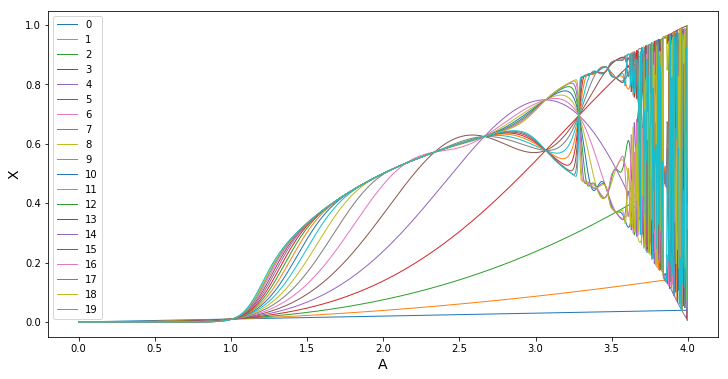

In [150]:
A_steps = 1000
A = np.arange(0.0, 4.0, 4.0/A_steps)
x = 0.01
X_iter = 20

fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111)
ax.set_xlabel('A', fontsize=14)
ax.set_ylabel('X', fontsize=14)

for i in range(X_iter):
    x = A * x * (1 - x)
    ax.plot(A, x, lw=1, label=i)

plt.legend()

### visualize  last 5 graphs on 20 iterations (first 15 graphs are skipped)

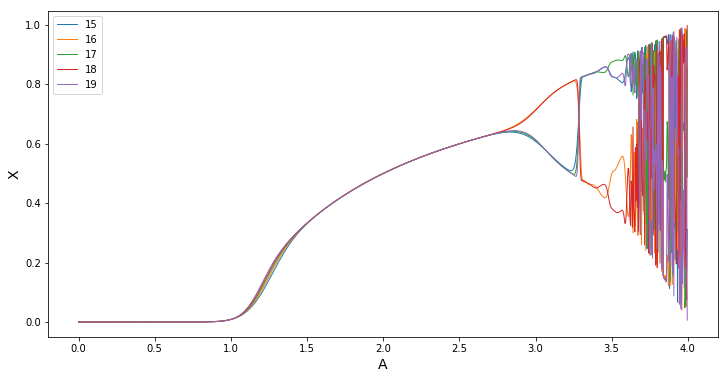

In [7]:
A_steps = 1000
A = np.arange(0.0, 4.0, 4.0/A_steps)
x = 0.01
X_iter = 20
X_lines = 5

fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111)
ax.set_xlabel('A', fontsize=14)
ax.set_ylabel('X', fontsize=14)

for i in range(X_iter):
    x = A * x * (1 - x)
    if i >= X_iter - X_lines:
        ax.plot(A, x, lw=1, label=i)

plt.legend()

### bifurcation graph: last 200 graphs on 400 iterations

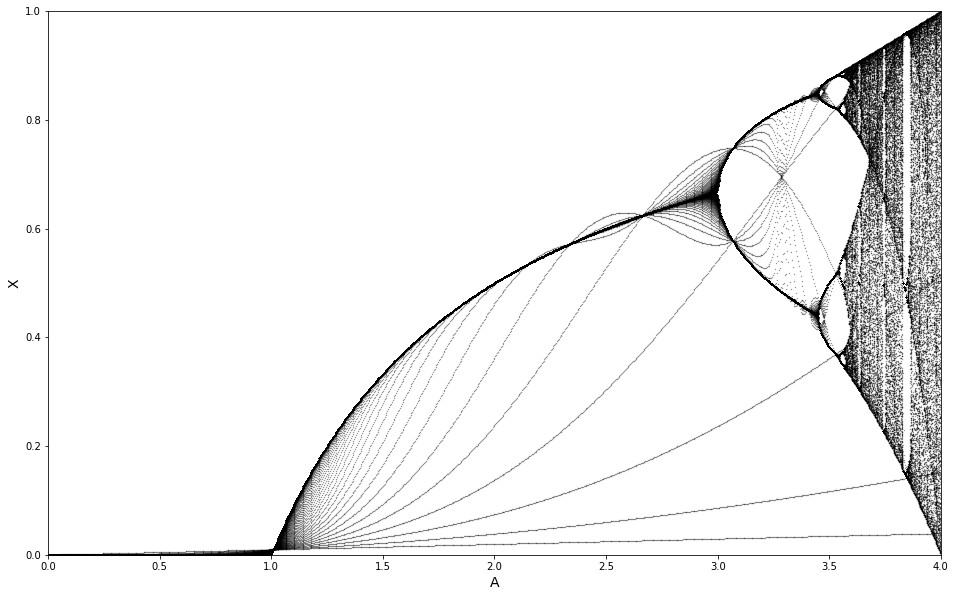

In [7]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

A_steps = 1000
A_min = 0
A_max = 4.0
A = np.arange(A_min, A_max, (A_max-A_min)/A_steps)
x = 0.01
X_min = 0
X_max = 1
X_iter = 400
X_lines = 400


fig = plt.figure(figsize=(16, 10))
ax = fig.add_subplot(111)
ax.axis([A_min, A_max, X_min, X_max])
ax.set_xlabel('A', fontsize=14)
ax.set_ylabel('X', fontsize=14)

for i in range(X_iter):
    x = A * x * (1 - x)
    if i >= X_iter - X_lines:
        ax.scatter(A, x, color='black', marker='o', s=0.1, alpha=0.6)
        #ax.plot(A, x, color='k', lw=1, alpha=0.6)

In [64]:
a = -2
x = 0.001
x_min = np.inf
x_max = -np.inf

for _ in range(300, 400):
    x = a * x * (1 - x)
    x_min = min(x_min, x)
    x_max = max(x_max, x)

print(x_min, x_max)

-0.49959130047402983 1.4983655359667243


### bifurcation graph with ipywidgets
* slider for range of horizontal axis  
* slider for range of vertical axis  
* button to save image

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interactive_output, VBox, HBox, Label, Button
from ipywidgets import FloatSlider, FloatRangeSlider, Layout
from IPython.display import display
import datetime
%matplotlib inline

def logistic_bifurcation(A_range, X_range, Dot_size):
    A_steps = 1000
    A = np.arange(A_range[0], A_range[1], (A_range[1]-A_range[0])/A_steps)
    x = 0.01
    X_iter = 400
    X_lines = 200
    X_min = 0.0
    X_max = 1.0
    A = np.arange(A_range[0], A_range[1], (A_range[1]-A_range[0])/A_steps)
    
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111)
    ax.set_xlim((A_range[0], A_range[1]))
    ax.set_ylim((X_range[0], X_range[1]))
    plt.xlabel('A: step size at ' + str(A_steps), fontsize=14)
    plt.ylabel('X: every ' + str(X_iter) + ' iterations', fontsize=14)
    
    for i in range(X_iter):
        x = A * x * (1 - x)
        if i >= X_iter - X_lines:
            ax.scatter(A, x, color='black', marker='o', s=Dot_size, alpha=0.6)

A_range = FloatRangeSlider(value=[2.8, 4.0], min=0.0, max=4.0, step=0.01, layout=Layout(width='60%'))
X_range = FloatRangeSlider(value=[0.0, 1.0], min=0.0, max=1.0, step=0.01, layout=Layout(width='60%'))
Dot_size = FloatSlider(value=0.2, min=0.01, max=1.0, step=0.01, layout=Layout(width='40%'))
BT = Button(value=False, description="save image")

S1 = HBox([Label('RANGE A:'), A_range])
S2 = HBox([Label('RANGE X:'), X_range])
S3 = HBox([Label('DOT SIZE:'), Dot_size, BT])
UI = VBox([S1, S2, S3])

W = interactive_output(logistic_bifurcation, {'A_range':A_range, 'X_range':X_range, 'Dot_size':Dot_size})
display(UI, W)

def button_pressed(b):
    logistic_bifurcation(A_range.value, X_range.value, Dot_size.value)
    d = str(datetime.datetime.now()).split('.')[0]
    plt.savefig('logistic' + d + '.png')
    plt.close()
    print('image saved at ' + d)
    
BT.on_click(button_pressed)

Output()

image saved at 2019-12-15 00:21:49


## magnified image (x1500) with parameters

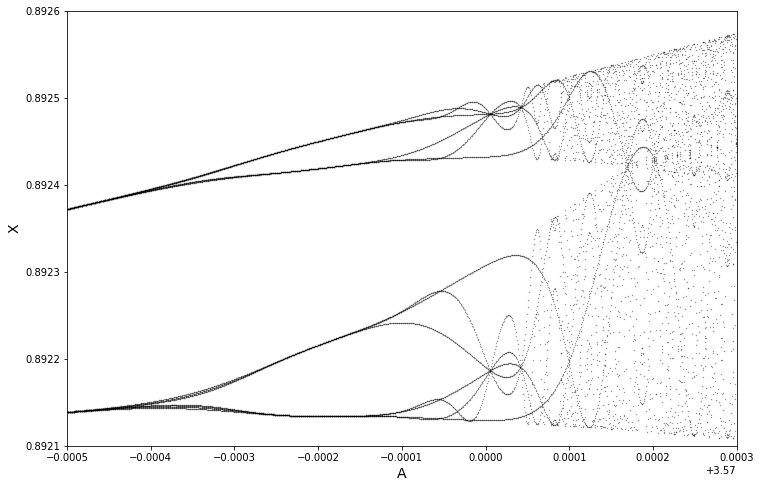

In [152]:
import numpy as np
import matplotlib.pyplot as plt

A_steps = 1000
A_min = 3.5695
A_max = 3.5703
A = np.arange(A_min, A_max, (A_max-A_min)/A_steps)
x = 0.01
X_min = 0.8921
X_max = 0.8926
X_iter = 400
X_lines = 200

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111)
ax.axis([A_min, A_max, X_min, X_max])
ax.set_xlabel('A', fontsize=14)
ax.set_ylabel('X', fontsize=14)

for i in range(X_iter):
    x = A * x * (1 - x)
    if i >= X_iter - X_lines:
        ax.scatter(A, x, color='black', marker='o', s=0.1, alpha=0.6)
        #ax.plot(A, x, color='k', lw=1, alpha=0.6)

In [ ]:
# simple way
import numpy as np
import matplotlib.pyplot as plt

A_steps = 2000000 # 200 million dots 
A_min = 1.0 # A_min > 0.481722549
A_max = 4.0
A = np.arange(A_min, A_max, (A_max-A_min)/A_steps)
x = 0.01
X_min = 0.0
X_max = 1.0
X_iter = 400
X_lines = 200

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111)
ax.axis([A_min, A_max, X_min, X_max])
ax.set_xlabel('A', fontsize=14)
ax.set_ylabel('X', fontsize=14)

X = []
for a in A:
    x = a * x * (1 - x)
    X.append(x)
    
ax.scatter(A, X, color='black', marker='o', s=0.01, alpha=0.6)